<a href="https://colab.research.google.com/github/avitalkras/Deep-Learning-Project/blob/main/Code_Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Neural Network regression


In this example, we will implement a (nonlinear) regression model using a neural network. To implement and train a neural net using Autograd, you only have to define the forward pass of the network and the loss function you wish to use; you do _not_ need to implement the _backward pass_ of the network. When you take the gradient of the loss function using `grad`, Autograd automatically computes computes the backward pass. It essentially executes the backpropagation algorithm implicitly.

![Neural Network Architecture for Regression](https://drive.google.com/uc?export=view&id=1iBNS40V_afm_Y1MUosDqeio0wbxgycfh)


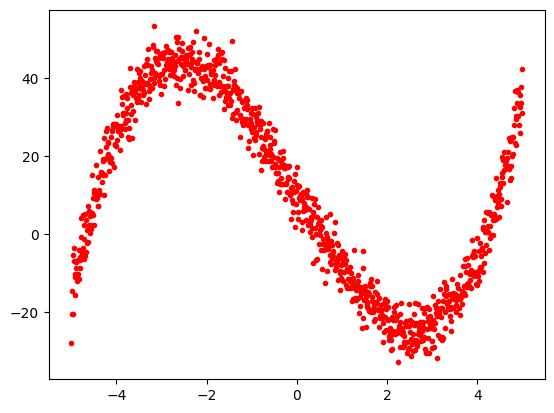

In [ ]:
import torch
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
# Generate synthetic data
x = np.linspace(-5, 5, 1000)
t = x ** 3 - 20 * x + 10 + npr.normal(0, 4, x.shape[0])
plt.plot(x, t, "r.")

x = torch.from_numpy(x).float()
t = torch.from_numpy(t)

tensor(337.7969, dtype=torch.float64, grad_fn=<MulBackward0>)
i: 0     loss: 337.7969
i: 500   loss: 184.8997
i: 1000  loss: 52.7564
i: 1500  loss: 54.0788
i: 2000  loss: 38.9647
i: 2500  loss: 28.9815
i: 3000  loss: 30.2496
i: 3500  loss: 44.4266
i: 4000  loss: 42.1107
i: 4500  loss: 40.9647
i: 5000  loss: 39.7170
i: 5500  loss: 39.0457
i: 6000  loss: 38.1479
i: 6500  loss: 37.4904
i: 7000  loss: 36.8204
i: 7500  loss: 36.3023
i: 8000  loss: 35.9203
i: 8500  loss: 35.2778
i: 9000  loss: 34.8017
i: 9500  loss: 34.2595


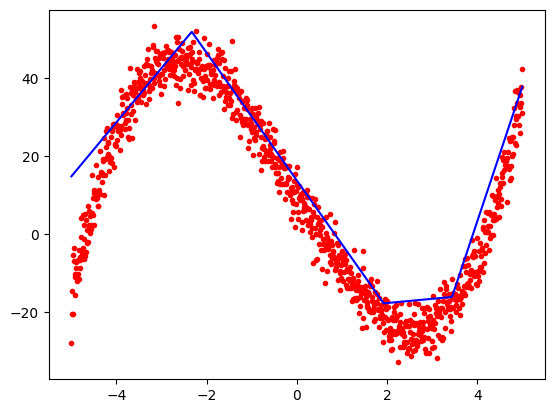

In [ ]:
inputs = x.reshape(x.shape[-1], 1)

params = {
    "W1": torch.randn(1, 4).requires_grad_(True),
    "b1": torch.randn(4).requires_grad_(True),
    "W2": torch.randn(4, 4).requires_grad_(True),
    "b2": torch.randn(4).requires_grad_(True),
    "W3": torch.randn(4, 1).requires_grad_(True),
    "b3": torch.randn(1).requires_grad_(True),
}


# We can define an optimizer which takes care of updating parameters based on their gradient.
optimizer = torch.optim.SGD(params.values(), lr=0.001)

# Pytorch also has implementation of wide range of activation functions such as: Tanh, ReLU, LeakyReLU, ...
nonlinearity = torch.nn.ReLU()


def predict(params, inputs):
    h1 = nonlinearity(torch.mm(inputs, params["W1"]) + params["b1"])
    h2 = nonlinearity(torch.mm(h1, params["W2"]) + params["b2"])
    output = torch.mm(h2, params["W3"]) + params["b3"]
    return output


def cost(params, outputs):
    return (1.0 / inputs.shape[0]) * torch.sum(0.5 * (outputs.reshape(outputs.shape[0]) - t) ** 2)

outputs = predict(params, inputs)
initial_loss = cost(params, outputs)
print(initial_loss)

num_epochs = 10000

for i in range(num_epochs):
    # Evaluate the gradient of the current parameters stored in params
    outputs = predict(params, inputs)
    loss = cost(params, outputs) #forward pass
    if i % 500 == 0:
        print(f"i: {i:<5d} loss: {loss.item():.4f}")
    optimizer.zero_grad()
    loss.backward() #backward pass (computes grads)
    optimizer.step() #updates params based on grads

with torch.no_grad():
    final_y = predict(params, inputs)
    plt.plot(x, t, "r.")
    plt.plot(x, final_y, "b-")